In [2]:
import glob
import loader
import seaborn as sns
import numpy as np
import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

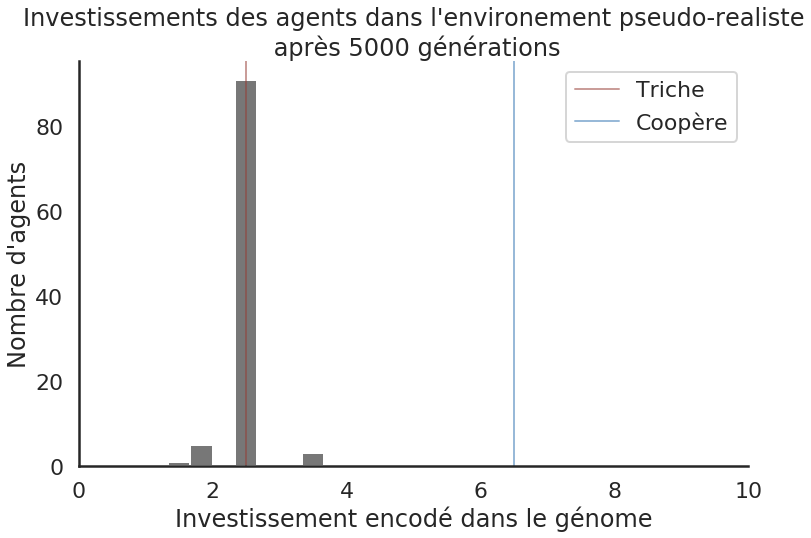

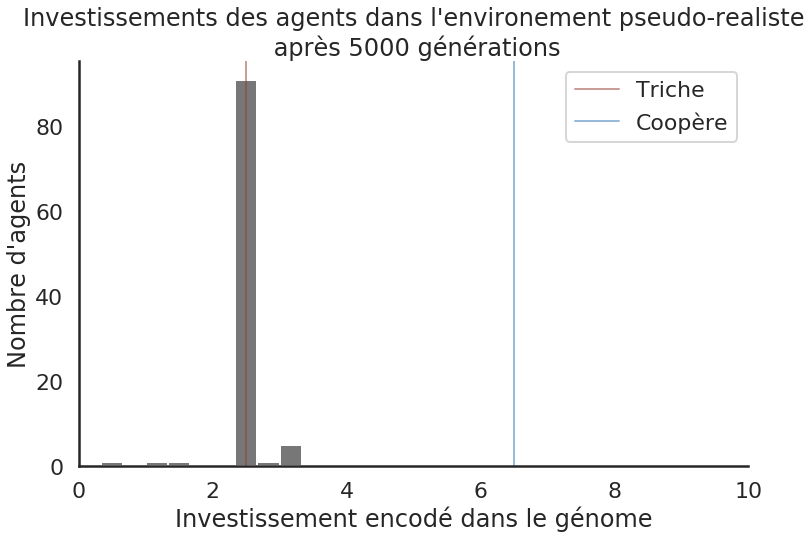

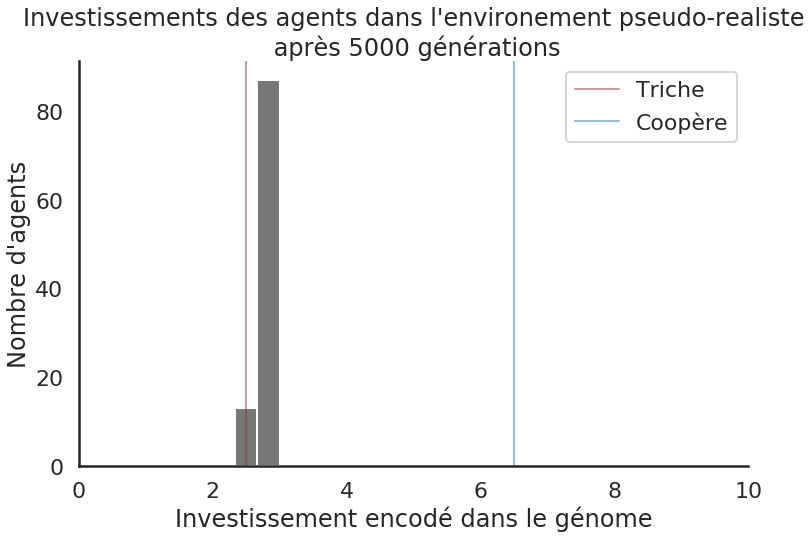

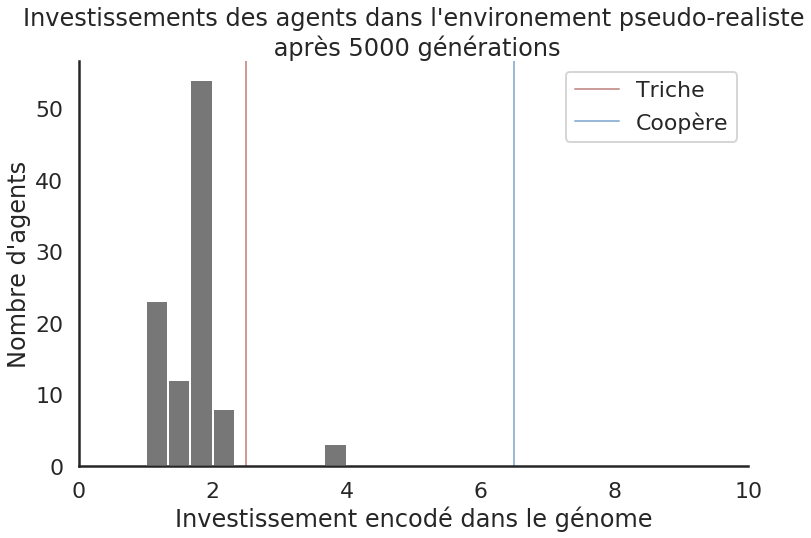

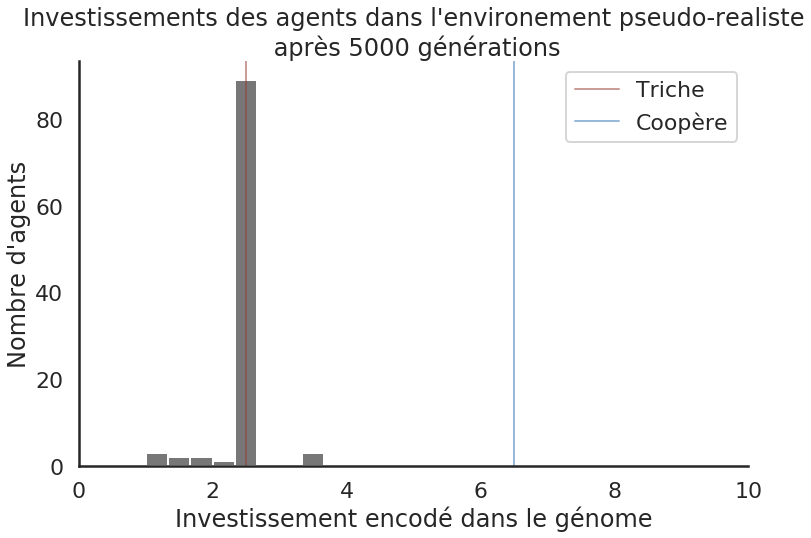

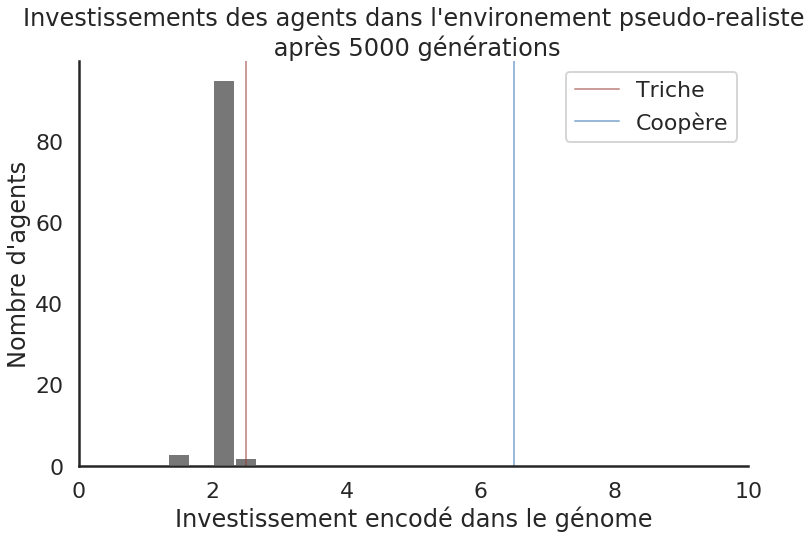

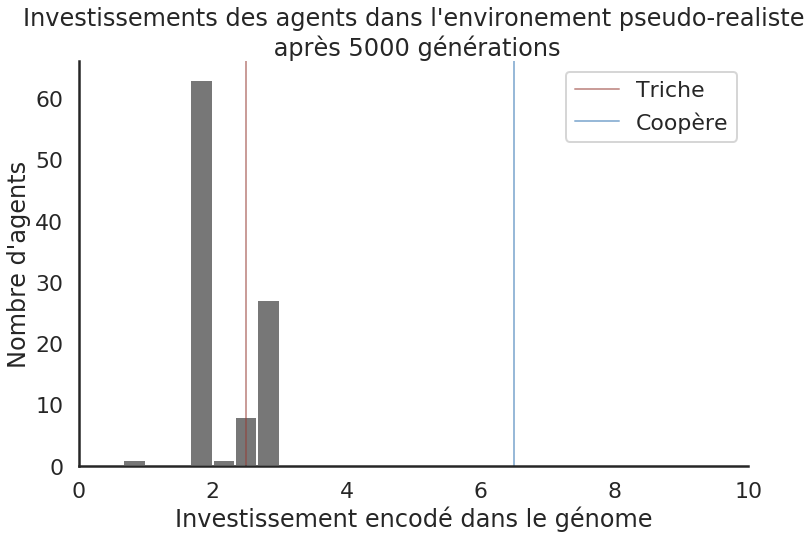

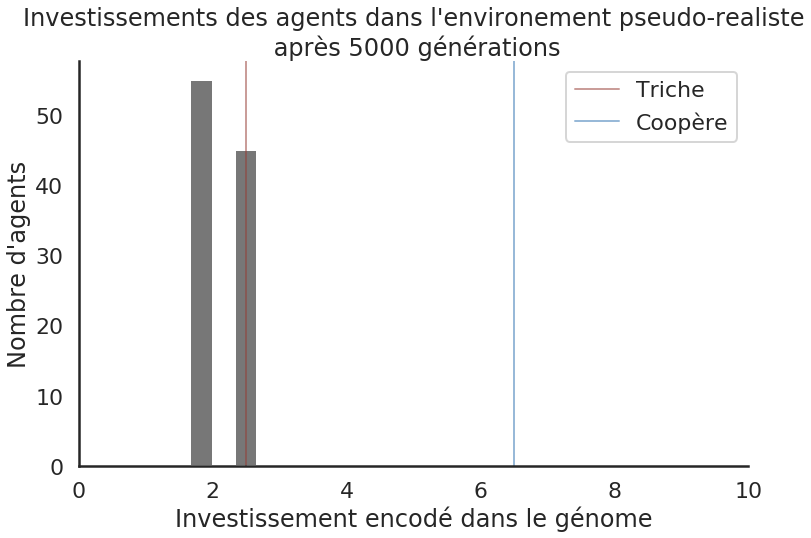

In [19]:
plosrcparams = {'backend': 'pdf',
                'axes.labelsize': 9,
                'xtick.labelsize': 9,
                'ytick.labelsize': 9,
                'legend.fontsize': 9,
                'lines.markersize': 3,
                'font.size': 9,
                'font.family': u'sans-serif',
                'font.sans-serif': ['Arial'],
                'text.usetex': False}

import matplotlib as mpl

mpl.rcParams.update(plosrcparams)
sns.set_context('poster')
sns.set_style('white')


val = '../../../logs/bm-classic-2019-04-13-1931/**/rep00/'
vals = glob.glob(val, recursive=True)
for gen, name, generation in zip(loader.getgenomes(vals), vals, loader.getlastgen(vals)):
    fig, axs = plt.subplots(1,1, figsize=(12, 12/1.61))
    sns.distplot(gen, kde=False, ax=axs, color="#777777", bins=np.arange(0, 10, 0.333333), hist_kws={'alpha': 1})
    axs.set_xlim(0, 10)
    axs.axvline(2.5, label="Triche", c="#963d35", linewidth=2, alpha=0.5)
    axs.axvline(6.5, label="Coopère", c="#3375b2", linewidth=2, alpha=0.5)
    axs.legend()
    sns.despine()
    axs.set_ylabel('Nombre d\'agents')
    axs.set_xlabel('Investissement encodé dans le génome')
    plt.title('Investissements des agents dans l\'environement pseudo-realiste\n après 5000 générations')
    plt.show(fig)
    plt.close(fig)

In [17]:
for fit in loader.getfitness([val]):
    sns.lineplot(x='gen', y='fitness', data=fit, ci=None)
    plt.ylim(0, None)
    

erreur, pas de run


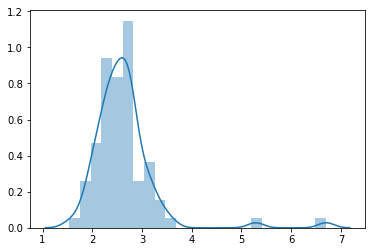

In [11]:
val = '/home/pecoffet/remoterobo/logs/bm-alife-tp-allconf-method2-noclamp-bigmut-2019*/nofake_see/*/rep00/'
vals = glob.glob(val, recursive=True)
res = []
for gen, name, generation in zip(loader.getgenomes(vals), vals, loader.getlastgen(vals)):
    res.append(np.median(gen))
sns.distplot(res)

In [6]:
val = '../../../logs/bm-alife-tp-allconf-method2-noclamp-bigsig-max50-2019*/*/*/rep00/'
#val = '/home/pecoffet/remoterobo/logs/bm-alife-tp-allconf-method2-noclamp-2019*/fake_see/*/rep00/'
vals = glob.glob(val, recursive=True)
    
i = 0
res = []
for value in vals:
    for genome, generation in zip(loader.getgenomes([value], np.arange(249, 10000, 250)), np.arange(249, 10000, 250)):
        #print(generation)
        for gene in genome:
            res.append({'gene':gene, 'generation': generation, 'run': i})
    i += 1
    if i > 50: break
maxi = i

In [7]:
df = pd.DataFrame(res)

In [60]:
df

,gene,generation,run
0,0.872443,249,0
1,4.640835,249,0
2,2.818467,249,0
3,1.842556,249,0
4,1.421357,249,0
5,4.084268,249,0
6,4.265519,249,0
7,3.271767,249,0
8,4.146102,249,0
9,4.108365,249,0


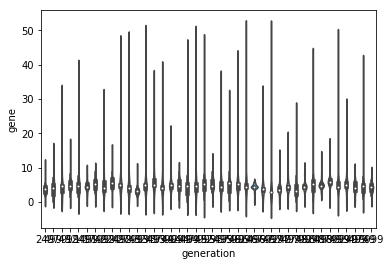

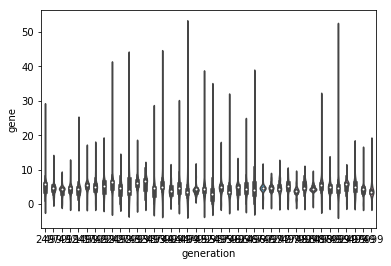

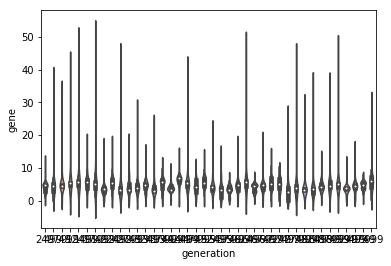

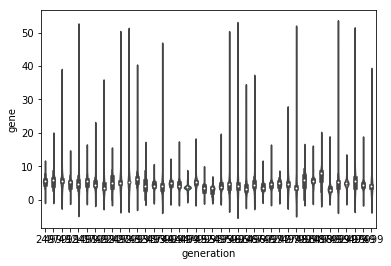

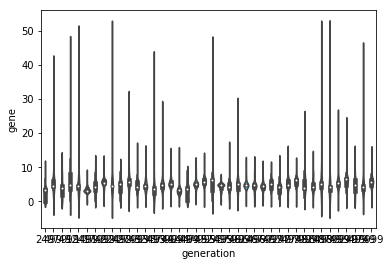

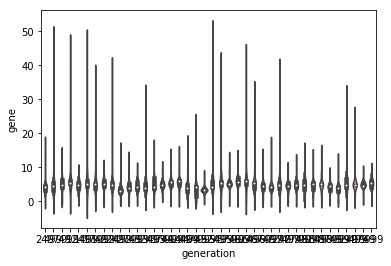

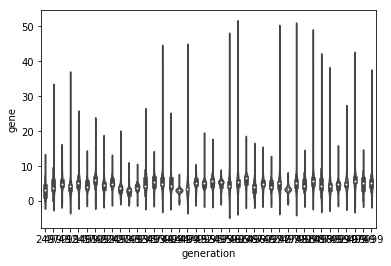

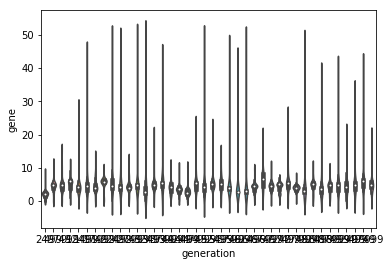

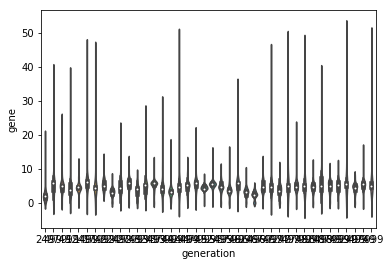

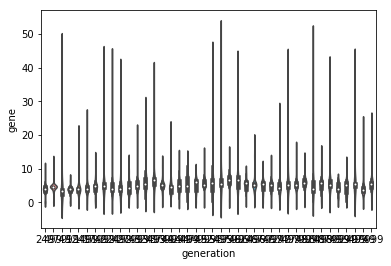

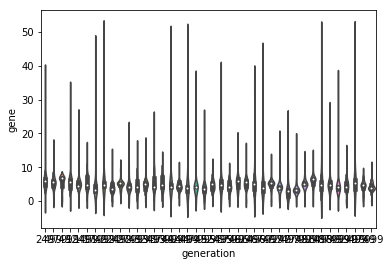

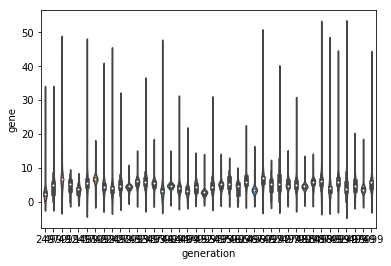

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [8]:
for currun in range(maxi):
    plt.figure()
    sns.violinplot(data=df.query(f'run == {currun}'), x='generation', y='gene')
    plt.show()

In [61]:
val = '../../../logs/bm-alife-tp-allconf-method2-noclamp-bigsig-max50-2019*/*/*/rep00/'
val = '../../../logs/bm-alife-tp-allconf-method2-noclamp-*/fake_see/*/rep00/'
vals = glob.glob(val, recursive=True)
    
i = 0
res = []
for value in vals:
    ok = False
    for genome, generation in zip(loader.getgenomes([value], [9999]), [9999]):
        print(i, generation)
        ok = True
        for gene in genome:
            res.append({'gene':gene, 'generation': generation, 'run': i})
    if ok:
        i += 1
    if i == 128: break
maxi = i


0 9999
1 9999
2 9999
3 9999
4 9999
5 9999
6 9999
7 9999
8 9999
9 9999
10 9999
11 9999
12 9999
13 9999
14 9999
15 9999
16 9999
17 9999
18 9999
19 9999
20 9999
21 9999
22 9999
23 9999
24 9999
25 9999
26 9999
27 9999
28 9999
29 9999
30 9999
31 9999
32 9999
33 9999
34 9999
35 9999
36 9999
37 9999
38 9999
39 9999
40 9999
41 9999
42 9999
43 9999
44 9999
45 9999
46 9999
47 9999
48 9999
49 9999
50 9999
51 9999
52 9999
53 9999
54 9999
55 9999
56 9999
57 9999
58 9999
59 9999
60 9999
61 9999
62 9999
63 9999
64 9999
65 9999
66 9999
67 9999
68 9999
69 9999
70 9999
71 9999
72 9999
73 9999
74 9999
75 9999
76 9999
77 9999
78 9999
79 9999
80 9999
81 9999
82 9999
83 9999
84 9999
85 9999
86 9999
87 9999
88 9999
89 9999
90 9999
91 9999
92 9999
93 9999
94 9999
95 9999
96 9999
97 9999
98 9999
99 9999
100 9999
101 9999
102 9999
103 9999
104 9999
105 9999
106 9999
107 9999
108 9999
109 9999
110 9999
111 9999
112 9999
113 9999
114 9999
115 9999
116 9999
117 9999
118 9999
119 9999
120 9999
121 9999
122 9999
123

In [62]:
df = pd.DataFrame(res)

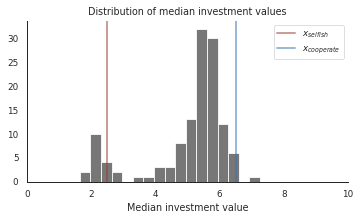

In [63]:
meds = df.groupby('run').median().reset_index()
plosrcparams = {'backend': 'pdf',
                'axes.labelsize': 9,
                'xtick.labelsize': 9,
                'ytick.labelsize': 9,
                'legend.fontsize': 9,
                'lines.markersize': 3,
                'font.size': 9,
                'font.family': u'sans-serif',
                'font.sans-serif': ['Arial'],
                'text.usetex': False}

import matplotlib as mpl

mpl.rcParams.update(plosrcparams)
sns.set_context('paper')
sns.set_style('white')

fig, axs = plt.subplots(1, 1, figsize=(5.1, 5.1/1.62 * 1))

labels = {'tp1': '1', 'tp0.1': '0.1', 'tp0.01': '0.01'}
sns.distplot(meds['gene'], bins=np.arange(0, 10, 0.33), ax=axs, kde=False, color="#777777", hist_kws={'alpha': 1})
axs.set_xlim(0, 10)
axs.set_title(f"Distribution of median investment values")
axs.axvline(2.5, label="$x_{selfish}$", c="#963d35", linewidth=2, alpha=0.5)
axs.axvline(6.5, label="$x_{cooperate}$", c="#3375b2", linewidth=2, alpha=0.5)
axs.set_xlabel('Median investment value')
axs.legend()
sns.despine()
fig.tight_layout()

meds

In [64]:
propSO = (meds.query('5 < gene < 8').count() / meds.count())['gene']
propESS = (meds.query('2 < gene < 3').count() / meds.count())['gene']
rem = 1 - propSO - propESS

In [65]:
print(f'SO: {100*propSO}')
print(f'ESS: {100*propESS}')
print(f'Other: {100*rem}')
print(meds.count())

SO: 71.09375
ESS: 11.71875
Other: 17.1875
run           128
gene          128
generation    128
dtype: int64


In [66]:
meds

,run,gene,generation
0,0,5.706270,9999
1,1,2.008462,9999
2,2,2.407930,9999
3,3,5.835392,9999
4,4,5.545004,9999
5,5,4.061248,9999
6,6,6.286765,9999
7,7,5.828500,9999
8,8,5.573510,9999
9,9,6.093572,9999
